In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

35420


In [2]:
# Required plotting setting
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _single_col_width, _double_col_width, _font_size, _ticklabel_size,_ticklabel_width

from matplotlib import cm
#from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})   

## Folders

In [3]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920'
# specifically for the first jupyter:
if not os.path.exists(postanalysis_folder):
    print(f"create postanalysis_folder: {postanalysis_folder}")
    os.makedirs(postanalysis_folder)
else:
    print(f"use postanalysis_folder: {postanalysis_folder}")

# figure folder    
dark_mode = False
if dark_mode:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0920_dark')
    plt.style.use('dark_background')
else:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0920')
print(figure_folder)

if not os.path.exists(figure_folder):
    print(f"create figure_folder: {figure_folder}")
    os.makedirs(figure_folder)
else:
    print(f"use figure_folder: {figure_folder}")

use postanalysis_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920
\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920\Figures_0920
use figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920\Figures_0920


In [4]:
example_figure_folder = os.path.join(figure_folder, '3D_rendering')
if not os.path.exists(example_figure_folder):
    print(f"Create example_figure_folder: {example_figure_folder}")
    os.makedirs(example_figure_folder)
else:
    print(f"Use example_figure_folder: {example_figure_folder}")

Create example_figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920\Figures_0920\3D_rendering


# Load codebook

In [5]:
import pandas as pd
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')

# Load chr2Zxys

In [6]:
subclass_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'subclass_2_chr2Zxys.pkl')
subclass_2_chr2ZxysList = pickle.load(open(subclass_2_chr2Zxys_filename, 'rb'))

## select cells

In [7]:
from ImageAnalysis3.figure_tools.plot_decode import Centering_Chr2ZxysListDict, summarize_chr2Zxys
from ImageAnalysis3.structure_tools.distance import sort_chr

In [8]:
genome_cmap = cm.Spectral.copy()

In [9]:
sel_subclass = 'L2/3 IT'
sel_cell_indices = []
for _cell_index, _chr2Zxys in enumerate(subclass_2_chr2ZxysList[sel_subclass]):
    if len(_chr2Zxys) >= 20:
        sel_cell_indices.append(_cell_index)

In [10]:
_sel_cell_ind = sel_cell_indices[3]
_dict = subclass_2_chr2ZxysList[sel_subclass][_sel_cell_ind]

C:\Users\puzheng\AppData\Local\Temp/ipykernel_35420/2542586504.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


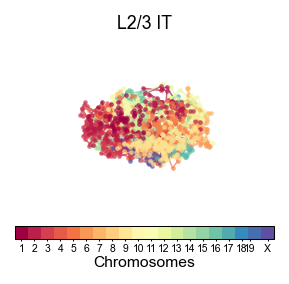

In [21]:
from matplotlib.colors import BoundaryNorm
from matplotlib import animation
plot_animation = True
hide_axes = True
add_refBar = False
background_color = (1,1,1,1)
refBar_len = 5 # in um
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
_chr_2_color = {_key:genome_cmap((sort_chr(_key)-1)/22) for _key in sorted(_dict.keys(), key = lambda v:sort_chr(v))}

plot_radius = 5

marker_size = 5
marker_alpha = 0.7

depthshade=False
fig = plt.figure(figsize=(_single_col_width, _single_col_width* 0.75), dpi=150)

ax3d = fig.add_subplot(111, projection='3d', azim=0, elev=30)
ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.02, top=0.92)
# turn off axes if needed
if hide_axes:
    ax3d.set_axis_off()
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_chr(v)):
    _zxys_list = _centered_dict[_chr]
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=_chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"{_chr}")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=_chr_2_color[_chr], linewidth=0.75, alpha=marker_alpha)
ax3d.tick_params('both', labelsize=_font_size-0.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=0, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in ax3d.spines.items()]

# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size, labelpad=0)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size, labelpad=0)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size, labelpad=0)
# title
ax3d.set_title(f"{sel_subclass}" ,fontsize=_font_size+1, pad=0)
# colorbar
bounds = [sort_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = BoundaryNorm(bounds, genome_cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=genome_cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0., 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_chr(v))), fontsize=_font_size)

cbar.ax.tick_params('both', labelsize=_font_size-2.5, 
                    width=_ticklabel_width, length=_ticklabel_size/2,
                    pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in cbar.ax.spines.items()]

# save
fig_basename = f"Decode3D_type_{sel_subclass.replace(' ', '_').replace(r'/', '-')}_cell_{_sel_cell_ind}"
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)
    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(example_figure_folder, fig_basename+".gif"), 
             writer=animation.PillowWriter(fps=30), dpi=300)
else:
    # add ref
    if add_refBar:
        # convert to degree, which matches numpy cos and sin
        _azim = (ax3d.azim%360) / 180 * np.pi 
        _elev = (ax3d.elev%360) / 180 * np.pi
        print(_azim, _elev)
        # start coordinate for colorbar
        _bar_starts = np.array([-0.99, # z, draw to the bottom
                                -np.sin(_azim), # x, y, extension goes through 0,0
                                np.cos(_azim), 
                                ]) * plot_radius
        # ongoing vector for colorbar:
        _bar_vector = np.array([0,
                                np.sin(_azim),
                                -np.cos(_azim),
                                ]) * refBar_len
        # therefore, end of colorbar
        _bar_ends = _bar_starts + _bar_vector
        #print(_bar_starts, _bar_ends)
        _ref_line = ax3d.plot([_bar_starts[1], _bar_ends[1]],
                              [_bar_starts[2], _bar_ends[2]], 
                              [_bar_starts[0], _bar_ends[0]], 
                              color=tuple([1-_c for _c in ax3d.get_facecolor()[:3]]+[1]), 
                              linewidth=2)

    # save pdf and png
    fig.savefig(os.path.join(example_figure_folder, fig_basename+".pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0, dpi=300)
    fig.savefig(os.path.join(example_figure_folder, fig_basename+".png"),
                transparent=True, bbox_inches='tight', pad_inches=0, dpi=300)
fig.show()

# For oligodendrocytes

In [23]:
sel_subclass = 'Oligo'
sel_cell_indices = []
for _cell_index, _chr2Zxys in enumerate(subclass_2_chr2ZxysList[sel_subclass]):
    if len(_chr2Zxys) >= 20:
        sel_cell_indices.append(_cell_index)

In [30]:
_sel_cell_ind = sel_cell_indices[4]
_dict = subclass_2_chr2ZxysList[sel_subclass][_sel_cell_ind]

C:\Users\puzheng\AppData\Local\Temp/ipykernel_35420/2542586504.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


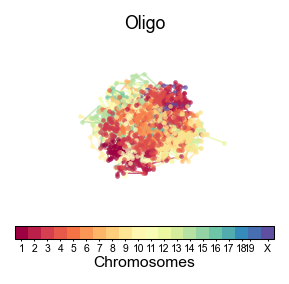

In [32]:
from matplotlib.colors import BoundaryNorm
from matplotlib import animation
plot_animation = True
hide_axes = True
add_refBar = False
background_color = (1,1,1,1)
refBar_len = 5 # in um
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
_chr_2_color = {_key:genome_cmap((sort_chr(_key)-1)/22) for _key in sorted(_dict.keys(), key = lambda v:sort_chr(v))}

plot_radius = 5

marker_size = 5
marker_alpha = 0.7

depthshade=False
fig = plt.figure(figsize=(_single_col_width, _single_col_width* 0.75), dpi=150)

ax3d = fig.add_subplot(111, projection='3d', azim=0, elev=30)
ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.02, top=0.92)
# turn off axes if needed
if hide_axes:
    ax3d.set_axis_off()
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_chr(v)):
    _zxys_list = _centered_dict[_chr]
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=_chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"{_chr}")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=_chr_2_color[_chr], linewidth=0.75, alpha=marker_alpha)
ax3d.tick_params('both', labelsize=_font_size-0.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=0, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in ax3d.spines.items()]

# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size, labelpad=0)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size, labelpad=0)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size, labelpad=0)
# title
ax3d.set_title(f"{sel_subclass}" ,fontsize=_font_size+1, pad=0)
# colorbar
bounds = [sort_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = BoundaryNorm(bounds, genome_cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=genome_cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0., 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_chr(v))), fontsize=_font_size)

cbar.ax.tick_params('both', labelsize=_font_size-2.5, 
                    width=_ticklabel_width, length=_ticklabel_size/2,
                    pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in cbar.ax.spines.items()]

# save
fig_basename = f"Decode3D_type_{sel_subclass.replace(' ', '_').replace(r'/', '-')}_cell_{_sel_cell_ind}"
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)
    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(example_figure_folder, fig_basename+".gif"), 
             writer=animation.PillowWriter(fps=30), dpi=300)
else:
    # add ref
    if add_refBar:
        # convert to degree, which matches numpy cos and sin
        _azim = (ax3d.azim%360) / 180 * np.pi 
        _elev = (ax3d.elev%360) / 180 * np.pi
        print(_azim, _elev)
        # start coordinate for colorbar
        _bar_starts = np.array([-0.99, # z, draw to the bottom
                                -np.sin(_azim), # x, y, extension goes through 0,0
                                np.cos(_azim), 
                                ]) * plot_radius
        # ongoing vector for colorbar:
        _bar_vector = np.array([0,
                                np.sin(_azim),
                                -np.cos(_azim),
                                ]) * refBar_len
        # therefore, end of colorbar
        _bar_ends = _bar_starts + _bar_vector
        #print(_bar_starts, _bar_ends)
        _ref_line = ax3d.plot([_bar_starts[1], _bar_ends[1]],
                              [_bar_starts[2], _bar_ends[2]], 
                              [_bar_starts[0], _bar_ends[0]], 
                              color=tuple([1-_c for _c in ax3d.get_facecolor()[:3]]+[1]), 
                              linewidth=2)

    # save pdf and png
    fig.savefig(os.path.join(example_figure_folder, fig_basename+".pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0, dpi=300)
    fig.savefig(os.path.join(example_figure_folder, fig_basename+".png"),
                transparent=True, bbox_inches='tight', pad_inches=0, dpi=300)
fig.show()